# Quick Dash score + VAS pain intensity
to assess whethere movement quality is related to patient reported functioning. 
We expect that movement quality post-operatively is related to patient reported disability and pain scores. 
And that there are differences in movement quality between the people with a DASH < 15 and those above 15. The threshold of 15 is chosen because this indicates whether someome is 'disabled' or not

1) Only retain t1 (1 months post-op data) 
and remove participants with to many NaN

2) Calculate the total DASH score

Berekening Quick DASH beperkingen en symptomen score:  
{(Som van de antwoorden op N items / N ) – 1} x 25 
N = aantal ingevulde antwoorden  
Let op: de Quick DASH score mag niet berekend worden als meer dan 1 vraag niet beantwoord is.


3) Split group on disabled group and non-disabled

4) Correlate the Quick Dash scores with movement quality. i.e. do people with a higher score perform better?


In [10]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

#### Input data sets
1) Dash scores

In [11]:
raw_dash = pd.read_csv("C:\\Users\\u0117545\\KU Leuven\\An De Groef - DATA\\VAS+QuickDASH\\UPLIFTBC-QuickDASH_DATA_2022-12-08.csv",
                   sep=';')

# only retain T1 of the dash scores 
dash = raw_dash.drop('pain_score', axis=1)
idx = dash['redcap_event_name'].str.contains('t1')
mask = np.where(idx)[0]
df_dash = dash.iloc[mask]
df_dash

,record_id,redcap_event_name,quickdash_1,quickdash_2,quickdash_3,quickdash_4,quickdash_5,quickdash_6,quickdash_7,quickdash_8,quickdash_9,quickdash_10,quickdash_11
1,BC_001,t1_1_month_postsur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BC_002,t1_1_month_postsur_arm_1,2.0,3.0,1.0,3.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0
7,BC_003,t1_1_month_postsur_arm_1,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
11,BC_005,t1_1_month_postsur_arm_1,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0
14,BC_006,t1_1_month_postsur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,BC_007,t1_1_month_postsur_arm_1,5.0,3.0,4.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0
18,BC_008,t1_1_month_postsur_arm_1,3.0,2.0,5.0,NaN,1.0,5.0,2.0,NaN,1.0,1.0,1.0
20,BC_009,t1_1_month_postsur_arm_1,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
23,BC_010,t1_1_month_postsur_arm_1,5.0,5.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0
25,BC_011,t1_1_month_postsur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
# remove participants with more than 2 NaNs
# Remove rows with missing values
print("Before removing rows with missing data: {} rows".format(len(df_dash)))
df_dash = df_dash.dropna(thresh=df_dash.shape[1]-1, axis=0)
print("After removing rows with missing data: {} rows".format(len(df_dash)))

Before removing rows with missing data: 49 rows
After removing rows with missing data: 36 rows


2) Movement quality parameters that were used in the pre-op vs post-op analysis

In [13]:
%store -r t1_noPain
t1_stored = t1_noPain
len(t1_stored)

30

#### Calculate total dash scores

In [14]:
som = df_dash.iloc[:,2:].sum(axis='columns')
col_n_counts = np.sum(df_dash.applymap(lambda x: 0 if pd.isnull(x) else 1), axis=1)-2
complete = col_n_counts.apply(lambda x:  x >= 10 )

total_score = ((som/col_n_counts)-1) * 25

print('Average score over all participants and timepoints = {}'.format(np.mean(total_score)))
print('Maximum and minumum scores are {} & {} respectively'.format(total_score.max(), total_score.min()))

#set-up dataframe for total dash scores. 
d = {'ppID': df_dash['record_id'],
    'total_score': total_score}
df_totaldash = pd.DataFrame(data=d)

print('No of t1 participants: {}'.format(len(df_totaldash)))


Average score over all participants and timepoints = 21.565656565656568
Maximum and minumum scores are 70.45454545454545 & 0.0 respectively
No of t1 participants: 36


In [15]:
# merge the dataframes on ppID remove time and trial (since it is all 1 months post op)
# use df for all furhter analysis
df = df_totaldash.merge(t1_stored)
df = df.drop(labels=['trial', 'time'], axis = 1)
df

,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
0,BC_011,0.000000,3.916610,1.783522,3.106436,2.486892,0.746115,0.543013,0.532413,0.900892,...,0.830671,0.424824,1.510298,1.907484,2.728349,3.879941,0.413147,0.521798,0.746349,-6.707485
1,BC_013,9.090909,2.354929,3.621872,3.282098,0.618862,1.273953,1.244943,0.957659,1.229253,...,0.814303,0.488189,1.982358,1.065326,3.049277,3.966452,0.523074,0.281102,0.804596,-7.273135
2,BC_014,31.818182,2.911912,1.480595,3.116100,1.822404,0.778489,0.617076,0.375651,0.826747,...,0.877002,0.491295,2.051499,1.500342,3.013309,4.211295,0.520415,0.380600,0.764403,-6.882059
3,BC_015,59.090909,3.333666,3.326168,2.694549,2.280530,0.986405,1.107375,0.680686,1.154115,...,0.890592,0.658816,3.032299,1.909733,4.262346,5.890270,0.544533,0.342946,0.765423,-6.137404
4,BC_016,6.818182,3.871052,1.113918,4.975438,0.691465,0.765933,0.551761,0.537202,0.777321,...,0.801367,0.538525,1.878661,1.070380,2.827184,3.766738,0.527829,0.300734,0.794327,-7.011247
5,BC_017,2.272727,2.353268,1.892571,3.795864,0.689695,0.698759,1.023886,0.649353,0.960357,...,0.712154,0.296661,2.716279,1.796489,3.906289,5.344648,0.534098,0.353241,0.768088,-6.667854
6,BC_019,31.818182,1.663697,2.047400,4.338155,4.398158,0.614018,0.925728,0.326842,0.629938,...,0.625791,0.348165,1.343927,0.979920,1.979415,2.716542,0.519807,0.379016,0.765603,-7.732105
7,BC_023,55.000000,2.465343,1.590303,3.721486,1.971756,0.726227,0.697152,0.525814,0.794004,...,0.728018,0.355259,1.675463,1.910166,2.694437,3.913241,0.452400,0.515773,0.727538,-7.185895
8,BC_029,20.454545,3.246910,0.297084,2.127903,2.424506,1.716077,1.868672,1.197169,1.662887,...,0.649689,0.376879,4.357190,2.154213,5.853549,7.853257,0.572671,0.283131,0.769340,-7.854389
9,BC_032,20.000000,2.656465,1.726180,2.623242,2.194953,0.496424,0.907010,0.482997,0.942457,...,0.663103,0.248115,1.572025,1.379056,2.166147,3.228698,0.522119,0.458028,0.719446,-7.376805


#### 3) Split group on disabled group and non-disabled

In [16]:
# find the people with a dash score higher than 15
idx = df['total_score'] >= 15
mask = np.where(idx)[0]
pain = df.iloc[mask]
pain['group'] = 1

# find the people with a dash score lower than 15
idx = df['total_score'] < 15
mask = np.where(idx)[0]
no_pain = df.iloc[mask]
no_pain['group'] = 0

print('number of people with perceived disablity: {}'.format(len(pain)))
print('number of people with no perceived disablity: {}'.format(len(no_pain)))

number of people with perceived disablity: 9
number of people with no perceived disablity: 11


C:\Users\u0117545\AppData\Local\Temp/ipykernel_9856/3095838114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pain['group'] = 1
C:\Users\u0117545\AppData\Local\Temp/ipykernel_9856/3095838114.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_pain['group'] = 0


In [17]:
df2 = pd.concat([pain, no_pain], axis=0, ignore_index=True)
df2


,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group
0,BC_014,31.818182,2.911912,1.480595,3.116100,1.822404,0.778489,0.617076,0.375651,0.826747,...,0.491295,2.051499,1.500342,3.013309,4.211295,0.520415,0.380600,0.764403,-6.882059,1
1,BC_015,59.090909,3.333666,3.326168,2.694549,2.280530,0.986405,1.107375,0.680686,1.154115,...,0.658816,3.032299,1.909733,4.262346,5.890270,0.544533,0.342946,0.765423,-6.137404,1
2,BC_019,31.818182,1.663697,2.047400,4.338155,4.398158,0.614018,0.925728,0.326842,0.629938,...,0.348165,1.343927,0.979920,1.979415,2.716542,0.519807,0.379016,0.765603,-7.732105,1
3,BC_023,55.000000,2.465343,1.590303,3.721486,1.971756,0.726227,0.697152,0.525814,0.794004,...,0.355259,1.675463,1.910166,2.694437,3.913241,0.452400,0.515773,0.727538,-7.185895,1
4,BC_029,20.454545,3.246910,0.297084,2.127903,2.424506,1.716077,1.868672,1.197169,1.662887,...,0.376879,4.357190,2.154213,5.853549,7.853257,0.572671,0.283131,0.769340,-7.854389,1
5,BC_032,20.000000,2.656465,1.726180,2.623242,2.194953,0.496424,0.907010,0.482997,0.942457,...,0.248115,1.572025,1.379056,2.166147,3.228698,0.522119,0.458028,0.719446,-7.376805,1
6,BC_036,31.818182,2.595476,0.919604,3.141144,1.072109,1.008877,1.493124,0.729076,1.072481,...,0.497070,4.121642,2.274336,5.325886,7.359377,0.579848,0.319962,0.749266,-6.674781,1
7,BC_037,47.727273,1.818848,1.105249,3.702942,3.739421,0.790161,1.061953,0.723550,1.236860,...,0.370936,2.463775,2.093517,3.424811,4.951100,0.523115,0.444501,0.727165,-6.659471,1
8,BC_044,15.000000,1.556850,1.870082,4.145810,2.413012,0.634191,0.563465,0.490979,0.630017,...,0.476947,2.292526,3.336512,4.105645,6.068526,0.397609,0.578674,0.712070,-6.939735,1
9,BC_011,0.000000,3.916610,1.783522,3.106436,2.486892,0.746115,0.543013,0.532413,0.900892,...,0.424824,1.510298,1.907484,2.728349,3.879941,0.413147,0.521798,0.746349,-6.707485,0


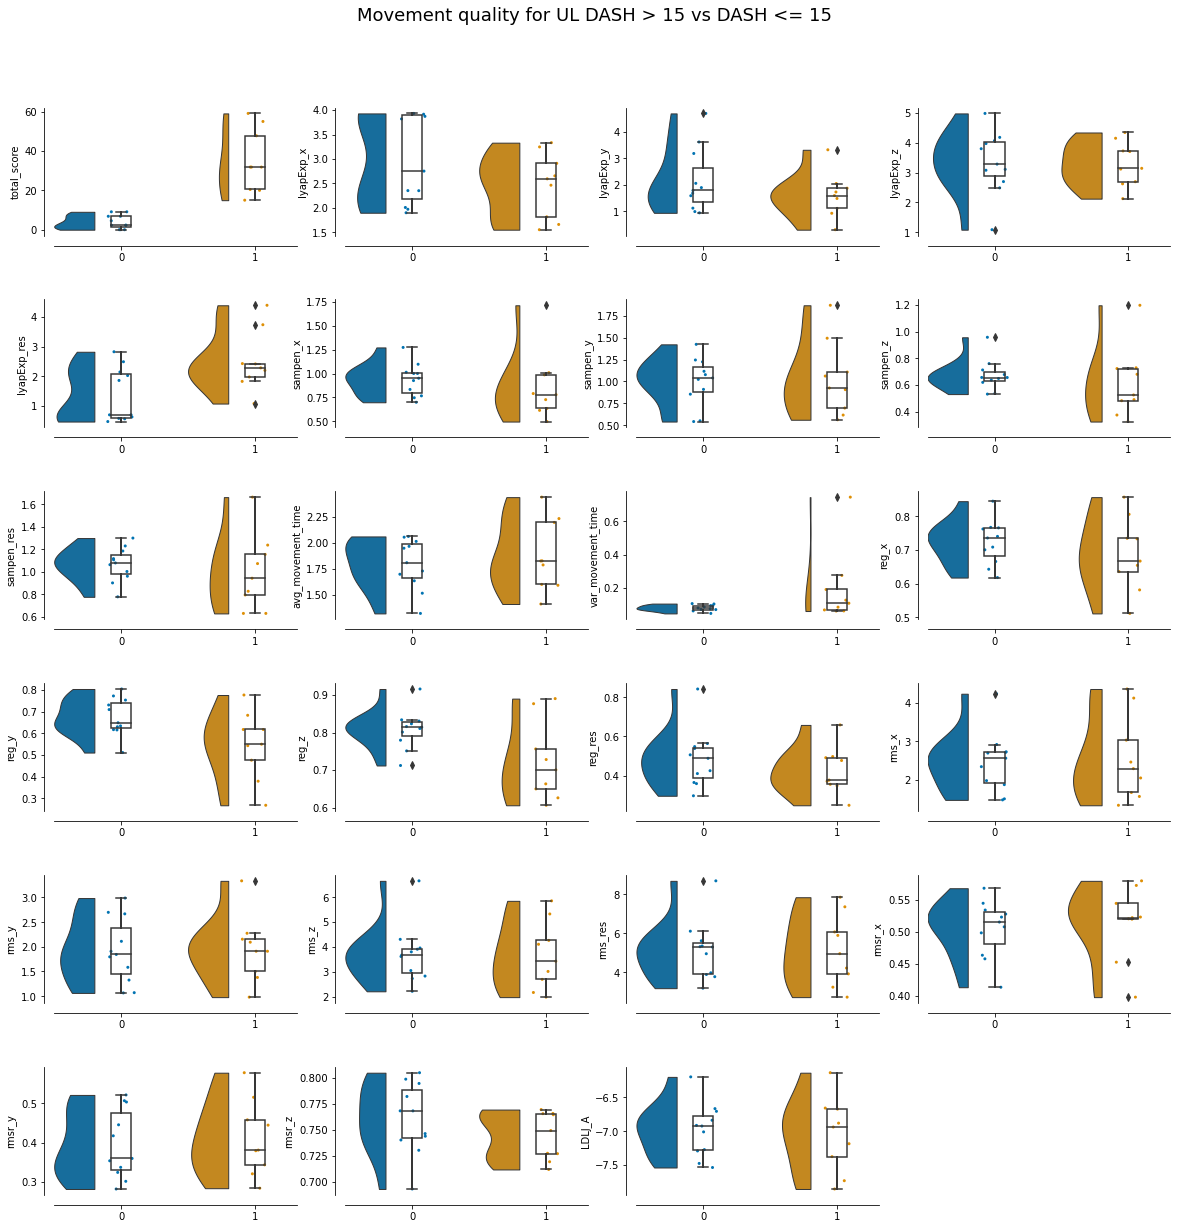

In [18]:
# plot the results
X = df2.drop(['ppID', 'group'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "group"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL DASH > 15 vs DASH <= 15", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df2, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')

In [19]:
for var in df2.columns:
    print('Analyzing {}'.format(var))
    if var == 'ppID' or var == 'group':
        print(80 * '_' + '\n')
    else:
        t_statistic, pvalue = stats.mannwhitneyu(pain[var], no_pain[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
        

Analyzing ppID
________________________________________________________________________________

Analyzing total_score
99.0 0.0002
________________________________________________________________________________

Analyzing lyapExp_x
33.0 0.2241
________________________________________________________________________________

Analyzing lyapExp_y
36.0 0.3233
________________________________________________________________________________

Analyzing lyapExp_z
46.0 0.8197
________________________________________________________________________________

Analyzing lyapExp_res
77.0 0.0402
________________________________________________________________________________

Analyzing sampen_x
32.0 0.1965
________________________________________________________________________________

Analyzing sampen_y
48.0 0.9394
________________________________________________________________________________

Analyzing sampen_z
37.0 0.3619
________________________________________________________________________

# set up data for logistic regression and subsequent AUC ROC analysis

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.linear_model import *
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ppID               20 non-null     object 
 1   total_score        20 non-null     float64
 2   lyapExp_x          20 non-null     float64
 3   lyapExp_y          20 non-null     float64
 4   lyapExp_z          20 non-null     float64
 5   lyapExp_res        20 non-null     float64
 6   sampen_x           20 non-null     float64
 7   sampen_y           20 non-null     float64
 8   sampen_z           20 non-null     float64
 9   sampen_res         20 non-null     float64
 10  avg_movement_time  20 non-null     float64
 11  var_movement_time  20 non-null     float64
 12  reg_x              20 non-null     float64
 13  reg_y              20 non-null     float64
 14  reg_z              20 non-null     float64
 15  reg_res            20 non-null     float64
 16  rms_x              20 non-nu

In [22]:
df2.describe()

,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,avg_movement_time,...,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,17.795455,2.752503,1.895191,3.316756,1.861473,0.902917,1.012558,0.646598,1.033356,1.835064,...,0.458278,2.498419,1.929865,3.677951,5.114736,0.509300,0.402609,0.753495,-7.014391,0.450000
std,18.968206,0.823623,1.065702,0.895214,1.089340,0.267485,0.340500,0.191865,0.243216,0.285083,...,0.135531,0.903269,0.642731,1.218368,1.593745,0.049529,0.089374,0.029836,0.457315,0.510418
min,0.000000,1.556850,0.297084,1.090889,0.462868,0.496424,0.543013,0.326842,0.629938,1.323810,...,0.248115,1.343927,0.979920,1.979415,2.716542,0.397609,0.281102,0.693383,-7.854389,0.000000
25%,2.272727,2.001471,1.111751,2.696945,0.691023,0.741143,0.815643,0.530763,0.882356,1.628274,...,0.363092,1.827862,1.470021,2.802475,3.904916,0.489566,0.333315,0.729700,-7.313436,0.000000
50%,9.090909,2.625970,1.703010,3.211621,1.995808,0.879695,1.031951,0.652913,1.067623,1.819048,...,0.450886,2.404097,1.908608,3.643854,5.122021,0.521267,0.379808,0.756834,-6.932308,0.000000
75%,31.818182,3.454897,2.049097,3.993072,2.415885,1.002762,1.143003,0.715635,1.161666,2.025595,...,0.514103,2.776267,2.184244,4.144820,5.934834,0.536707,0.469445,0.768425,-6.699309,1.000000
max,59.090909,3.931003,4.704862,4.975438,4.398158,1.716077,1.868672,1.197169,1.662887,2.440476,...,0.842503,4.357190,3.336512,6.658223,8.694865,0.579848,0.578674,0.804596,-6.137404,1.000000


In [23]:
df2['group'].value_counts()

0    11
1     9
Name: group, dtype: int64

sns.pairplot(df2, hue='group')

In [24]:
df2['product'] = df2['LDLJ_A'] * df2['sampen_res']
df2['ratio'] = df2['sampen_res'] / df2['LDLJ_A']
df2.head()

,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group,product,ratio
0,BC_014,31.818182,2.911912,1.480595,3.116100,1.822404,0.778489,0.617076,0.375651,0.826747,...,1.500342,3.013309,4.211295,0.520415,0.380600,0.764403,-6.882059,1,-5.689719,-0.120131
1,BC_015,59.090909,3.333666,3.326168,2.694549,2.280530,0.986405,1.107375,0.680686,1.154115,...,1.909733,4.262346,5.890270,0.544533,0.342946,0.765423,-6.137404,1,-7.083271,-0.188046
2,BC_019,31.818182,1.663697,2.047400,4.338155,4.398158,0.614018,0.925728,0.326842,0.629938,...,0.979920,1.979415,2.716542,0.519807,0.379016,0.765603,-7.732105,1,-4.870748,-0.081470
3,BC_023,55.000000,2.465343,1.590303,3.721486,1.971756,0.726227,0.697152,0.525814,0.794004,...,1.910166,2.694437,3.913241,0.452400,0.515773,0.727538,-7.185895,1,-5.705632,-0.110495
4,BC_029,20.454545,3.246910,0.297084,2.127903,2.424506,1.716077,1.868672,1.197169,1.662887,...,2.154213,5.853549,7.853257,0.572671,0.283131,0.769340,-7.854389,1,-13.060960,-0.211714


<AxesSubplot:xlabel='ratio', ylabel='total_score'>

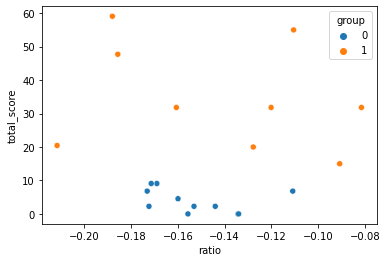

In [25]:
sns.scatterplot(x='ratio', y='total_score', data = df2, hue = 'group')

<AxesSubplot:>

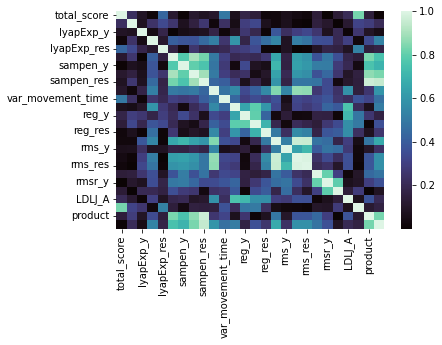

In [26]:
sns.heatmap(abs(df2.corr()), cmap="mako")

Accuracy: 60.0%


,0,1
0,1,0
1,2,2


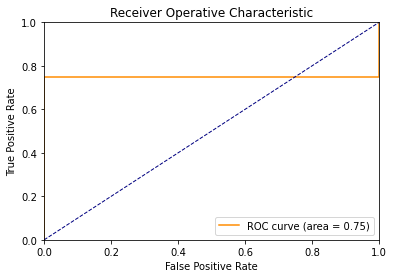

In [27]:
regularization_path = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

#set X and y
X = df2.drop(['ppID', 'total_score', 'group'],axis=1)
y = df2['group']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression
prev_accuracy = 0
prev_C = None

for C in regularization_path:
    pipeline = LogisticRegression(penalty = 'l1', solver = 'liblinear', C=C)
    model = pipeline.fit(X_train, y_train)
    n = (model.coef_ != 0).sum()
    accuracy = model.score(X_train, y_train)
    if accuracy < prev_accuracy: break
    prev_accuracy = accuracy
    prev_C = C
    
pipeline = LogisticRegression(penalty='l1', solver = 'liblinear', C=prev_C)
model = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy: {}%'.format(accuracy_score(y_test, y_pred)*100))
        
# Confusion Matrix 
m = pd.DataFrame(confusion_matrix(y_test, y_pred))
display(m)

# ROC and AUC
y_score = pipeline.decision_function(X_test)
probs = model.predict_proba(X_test)
probs = probs[:,1]
fpr = dict()
tpr = dict()
roc_auc = dict()
# compute ROC curve and AUC for each class 
fpr[0], tpr[0], _ = roc_curve(y_test[:], probs[:])
roc_auc[0] = auc(fpr[0], tpr[0])

# plot the ROC curve
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color= 'navy', lw = 1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operative Characteristic')
plt.legend(loc='lower right')
plt.show()

In [28]:
coeficients = pd.DataFrame({'feature_name':X.columns,
                          'model.coef': model.coef_[0]})

In [29]:
coeficients

,feature_name,model.coef
0,lyapExp_x,0.000000
1,lyapExp_y,-0.210933
2,lyapExp_z,-0.626725
3,lyapExp_res,0.000000
4,sampen_x,0.000000
5,sampen_y,0.000000
6,sampen_z,-2.072287
7,sampen_res,0.000000
8,avg_movement_time,-0.138457
9,var_movement_time,0.000000


,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group,product,ratio
3,BC_023,55.0,2.465343,1.590303,3.721486,1.971756,0.726227,0.697152,0.525814,0.794004,...,1.910166,2.694437,3.913241,0.4524,0.515773,0.727538,-7.185895,1,-5.705632,-0.110495


In [31]:
t1_stored

,ppID,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
0,BC_011,F_L_001,T1,3.916610,1.783522,3.106436,2.486892,0.746115,0.543013,0.532413,...,0.830671,0.424824,1.510298,1.907484,2.728349,3.879941,0.413147,0.521798,0.746349,-6.707485
1,BC_013,F_L_001,T1,2.354929,3.621872,3.282098,0.618862,1.273953,1.244943,0.957659,...,0.814303,0.488189,1.982358,1.065326,3.049277,3.966452,0.523074,0.281102,0.804596,-7.273135
2,BC_014,F_R_001,T1,2.911912,1.480595,3.116100,1.822404,0.778489,0.617076,0.375651,...,0.877002,0.491295,2.051499,1.500342,3.013309,4.211295,0.520415,0.380600,0.764403,-6.882059
3,BC_015,F_R_001,T1,3.333666,3.326168,2.694549,2.280530,0.986405,1.107375,0.680686,...,0.890592,0.658816,3.032299,1.909733,4.262346,5.890270,0.544533,0.342946,0.765423,-6.137404
4,BC_016,F_L_001,T1,3.871052,1.113918,4.975438,0.691465,0.765933,0.551761,0.537202,...,0.801367,0.538525,1.878661,1.070380,2.827184,3.766738,0.527829,0.300734,0.794327,-7.011247
5,BC_017,F_L_001,T1,2.353268,1.892571,3.795864,0.689695,0.698759,1.023886,0.649353,...,0.712154,0.296661,2.716279,1.796489,3.906289,5.344648,0.534098,0.353241,0.768088,-6.667854
6,BC_018,F_L_001,T1,4.067659,1.600003,3.620157,3.189770,0.657197,1.046448,0.510981,...,0.780155,0.566980,1.691246,0.866171,2.516461,3.347248,0.536346,0.274689,0.798047,-7.049960
7,BC_019,F_R_001,T1,1.663697,2.047400,4.338155,4.398158,0.614018,0.925728,0.326842,...,0.625791,0.348165,1.343927,0.979920,1.979415,2.716542,0.519807,0.379016,0.765603,-7.732105
8,BC_023,F_L_001,T1,2.465343,1.590303,3.721486,1.971756,0.726227,0.697152,0.525814,...,0.728018,0.355259,1.675463,1.910166,2.694437,3.913241,0.452400,0.515773,0.727538,-7.185895
9,BC_026,F_L_001,T1,3.397676,2.512752,3.232257,1.604722,1.029818,1.239060,0.822474,...,0.790499,0.467707,2.581876,1.904333,4.241964,5.607092,0.485449,0.358056,0.797581,-6.784553
